In [1]:
import pandas as pd
import os

folder_path = '/Users/markuswiikjensen/Desktop/Master-Data/Related financial data'  # replace with the path to your folder
dfs = []  # initialize an empty list to store the DataFrames

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path, delimiter='\t', encoding='ISO-8859-1' )  # read the CSV file as a DataFrame
    dfs.append(df)  # append the DataFrame to the list

# print the list of DataFrames

In [2]:
df1=dfs[0]
df1=df1['BZ=F,NG=F,Date'].str.split(',', expand=True)
df1.columns=['BZ=F','NG=F','Date']

In [3]:
df1

,BZ=F,NG=F,Date
0,582.4649334405432,18.656461532682748,2020-01-02
1,605.0425091937934,18.786306741837162,2020-01-03
2,606.2898374730953,18.78433795432779,2020-01-06
3,602.2083448962503,19.07096045229796,2020-01-07
4,579.9697490326629,18.974865604508746,2020-01-08
...,...,...,...
753,825.2001476887592,49.94270303159128,2022-12-23
754,832.6238273784338,52.1512986448066,2022-12-27
755,817.6930378971243,46.24689535337283,2022-12-28
756,814.952598870534,45.16616598833715,2022-12-29


In [4]:
df2=dfs[1]
df2=df2['Date,Adj Close'].str.split(',', expand=True)
df2.columns=['Date','Adj Close']

In [5]:
df2.drop(columns='Date', inplace=True)

In [6]:
df=pd.concat([df1,df2], axis=1)

In [7]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')
df=df.set_index('Date')

<AxesSubplot:title={'center':'Brent Oil Spot'}, xlabel='Date'>

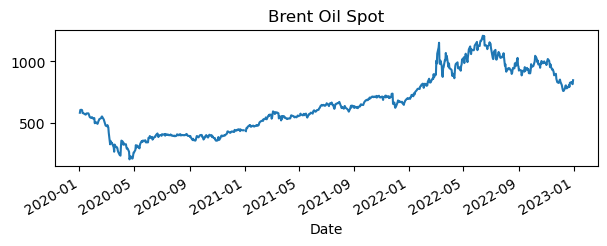

In [8]:
import numpy as np
# Truncate numbers in the 'BZ=F' column
df['BZ=F'] = pd.to_numeric(df['BZ=F'], errors='coerce')
df['BZ=F'] = np.floor(df['BZ=F']).astype(float)

# Plot the updated column
df['BZ=F'].plot(figsize=(7,2), title='Brent Oil Spot')

<AxesSubplot:title={'center':'LNG Spot'}, xlabel='Date'>

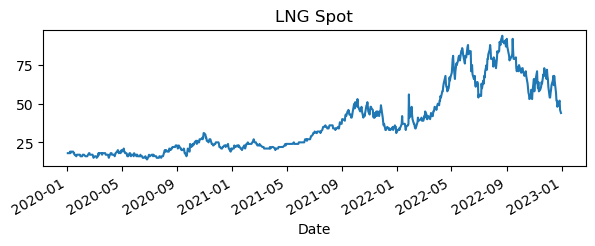

In [9]:
# Truncate numbers in the 'BZ=F' column
df['NG=F'] = pd.to_numeric(df['NG=F'], errors='coerce')
df['NG=F'] = np.floor(df['NG=F']).astype(float)

# Plot the updated column
df['NG=F'].plot(figsize=(7,2),title= 'LNG Spot')

<AxesSubplot:title={'center':'OSEBX Price'}, xlabel='Date'>

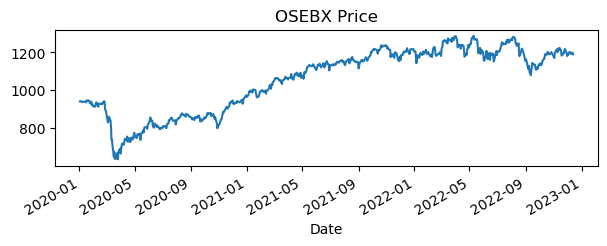

In [10]:
# Truncate numbers in the 'BZ=F' column
df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
df['Adj Close'] = np.floor(df['Adj Close']).astype(float)

# Plot the updated column
df['Adj Close'].plot(figsize=(7,2),title='OSEBX Price')